<center>

*******************************************************************************************
    
### Audio
###### and
### Music Information Retrieval
      
<br>
  
##### 22 JANUARY 2024

##### Juan Ignacio Mendoza Garay  

*******************************************************************************************

</center>

#### INFORMATION:


* Description:

    Audio and music-information-retrieval.

* Instructions:

    Edit the values indicated with an arrow like this: <---  
    Comment/uncomment or change values as suggested by the comments.  
    Run the program, close your eyes and hope for the best.  

*******************************************************************************************


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.transforms as mpt
import seaborn as sns

from glob import glob

import librosa
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

print('imports done')

imports done


## Load and Inspect Data

reference: https://www.kaggle.com/code/robikscube/working-with-audio-in-python/notebook

In [11]:
audio_folder = r'C:\Users\me\Music' # <--- full path to folder with wav files without ending backslash
audio_fn = 'Medtner_Deux Contes_Op_20_Two_Fairy_Tales1_Bflat_minor.wav' # <--- wav filename (with extension)

In [55]:
# open wav file:

full_fn = audio_folder+'\\'+ audio_fn
y, sr = librosa.load(full_fn)

print(f'length: {y.shape[0]}')
print(f'sample rate: {sr}')

# ipd.Audio(y, rate=sr) # uncomment to play audio, but the notebook's size will greatly increase

length: 3219457
sample rate: 22050


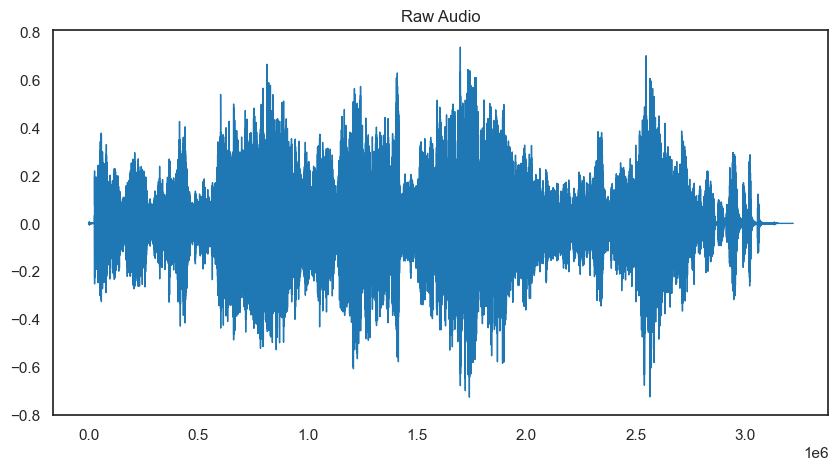

In [14]:
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio',
                  color=color_pal[0])
plt.show()

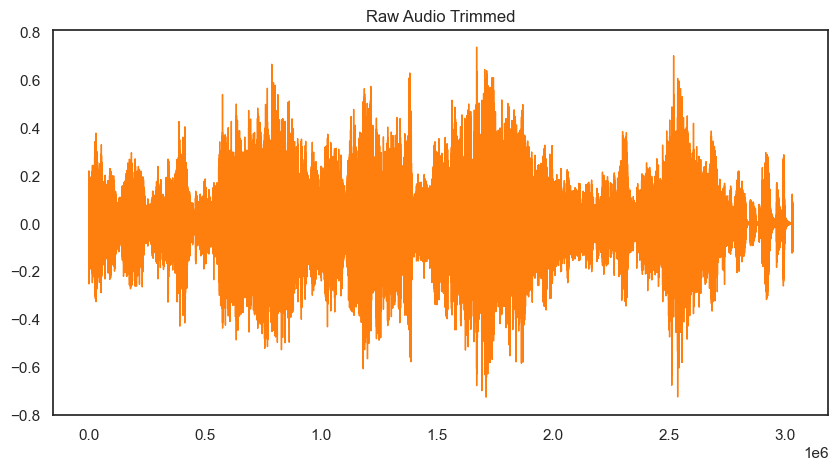

In [15]:
# Trim leading and ending silence:

y_trimmed, _ = librosa.effects.trim(y, top_db=20)
pd.Series(y_trimmed).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Trimmed',
                  color=color_pal[1])
plt.show()

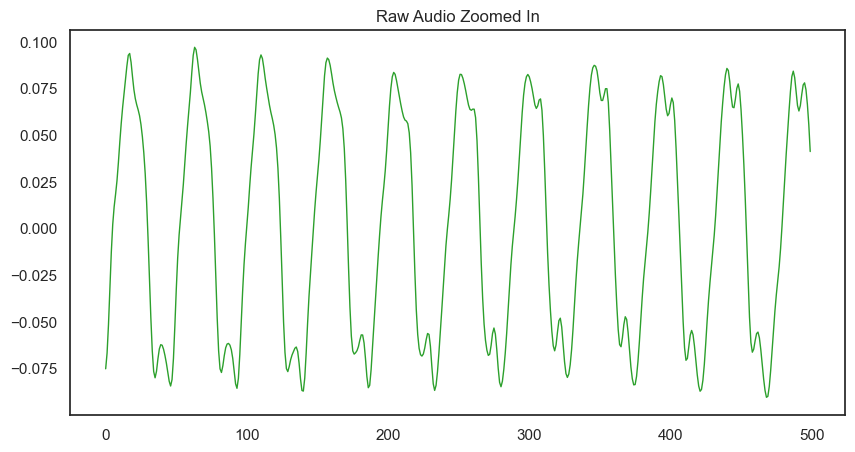

In [16]:
pd.Series(y[30000:30500]).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Zoomed In',
                 color=color_pal[2])
plt.show()

In [ ]:
# Short-time Fourier Transform:

D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

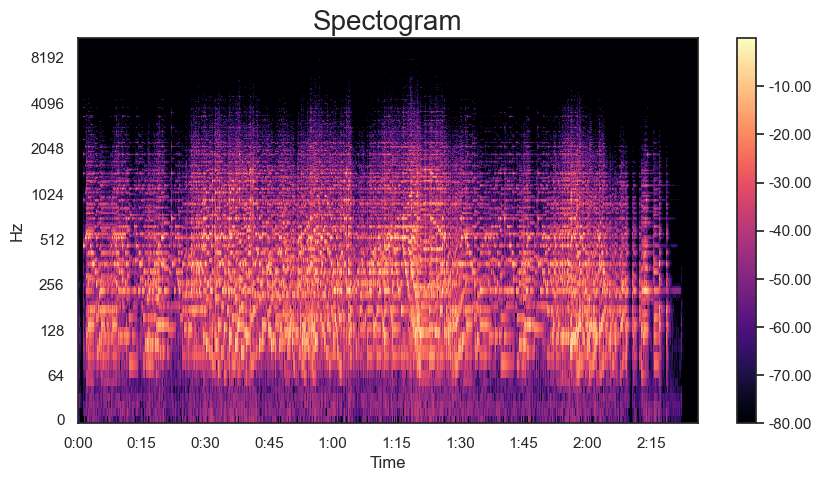

In [18]:
# Plot the transformed audio data:

fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectrogram', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [19]:
# Mel spectrogram:

S = librosa.feature.melspectrogram(y=y,
                                   sr=sr,
                                   n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

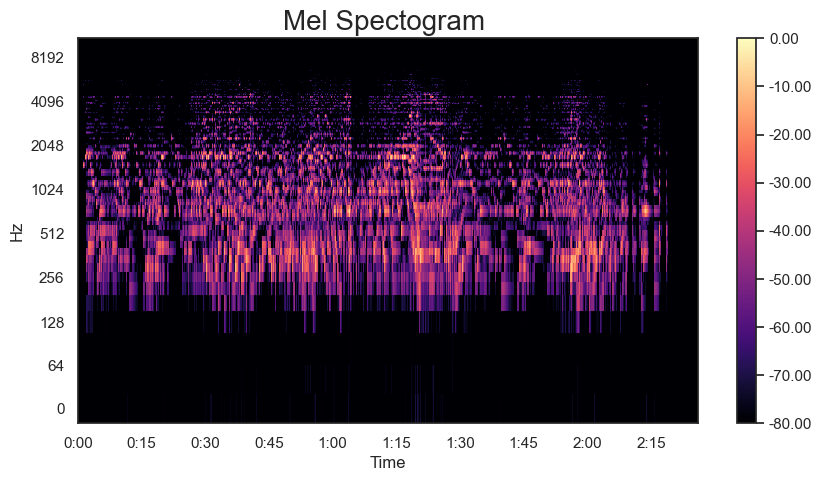

In [20]:
# Plot the mel spectrogram:

fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectrogram ', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

## Chromagram

reference: https://librosa.org/doc/latest/feature.html

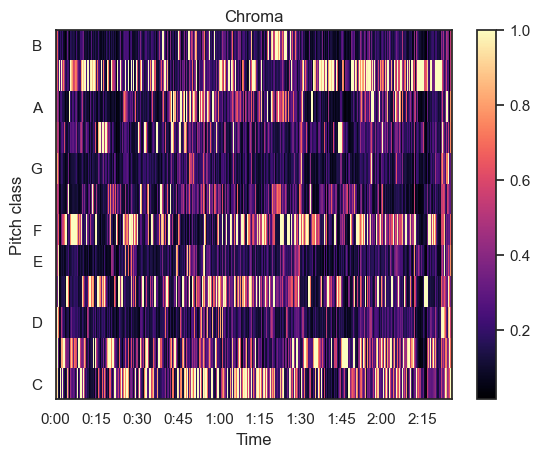

In [21]:
fig, ax = plt.subplots(sharex=True)

feat_chroma = librosa.feature.chroma_cqt(y=y, sr=sr)

img = librosa.display.specshow(feat_chroma,
                               y_axis='chroma', x_axis='time', ax=ax)
ax.set(title='Chroma')
fig.colorbar(img, ax=[ax])
plt.show()

## Segmentation

reference: https://librosa.org/doc/latest/segment.html

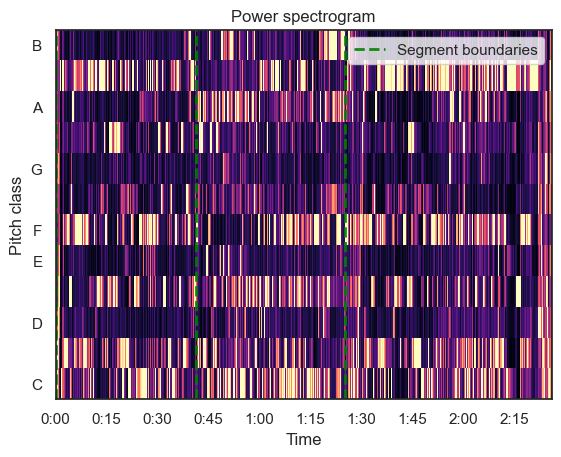

In [28]:
# Bottom-up temporal segmentation.

n_seg = 3 # <--- number of segments

bounds = librosa.segment.agglomerative(feat_chroma, n_seg)

bound_times = librosa.frames_to_time(bounds, sr=sr)

fig, ax = plt.subplots()

trans = mpt.blended_transform_factory(

            ax.transData, ax.transAxes)

librosa.display.specshow(feat_chroma, y_axis='chroma', x_axis='time', ax=ax)

ax.vlines(bound_times, 0, 1, color='green', linestyle='--',

          linewidth=2, alpha=0.9, label='Segment boundaries',

          transform=trans)

ax.legend()

ax.set(title='Power spectrogram');